<a href="https://colab.research.google.com/github/AlexBB999/junk/blob/master/L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from sqlalchemy import create_engine
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import statsmodels.api as sm
from collections import Counter

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
import time

from sklearn.datasets import fetch_openml
import umap

In [0]:
k1=pd.read_csv('https://raw.githubusercontent.com/AlexBB999/London/master/Apr_lsoa_grocery.csv')

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
k1.shape

(4272, 202)

In [6]:
k1.head()

,area_id,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,volume_perc2.5,volume_perc25,volume_perc50,volume_perc75,volume_perc97.5,volume_std,volume_ci95,fat,fat_perc2.5,fat_perc25,fat_perc50,fat_perc75,fat_perc97.5,fat_std,fat_ci95,saturate,saturate_perc2.5,saturate_perc25,saturate_perc50,saturate_perc75,saturate_perc97.5,saturate_std,saturate_ci95,salt,salt_perc2.5,salt_perc25,salt_perc50,salt_perc75,salt_perc97.5,salt_std,salt_ci95,sugar,sugar_perc2.5,sugar_perc25,sugar_perc50,sugar_perc75,sugar_perc97.5,sugar_std,sugar_ci95,protein,protein_perc2.5,protein_perc25,protein_perc50,protein_perc75,protein_perc97.5,protein_std,protein_ci95,carb,carb_perc2.5,carb_perc25,carb_perc50,carb_perc75,carb_perc97.5,carb_std,carb_ci95,fibre,fibre_perc2.5,fibre_perc25,fibre_perc50,fibre_perc75,fibre_perc97.5,fibre_std,fibre_ci95,alcohol,alcohol_perc2.5,alcohol_perc25,alcohol_perc50,alcohol_perc75,alcohol_perc97.5,alcohol_std,alcohol_ci95,energy_fat,energy_fat_perc2.5,energy_fat_perc25,energy_fat_perc50,energy_fat_perc75,energy_fat_perc97.5,energy_fat_std,energy_fat_ci95,energy_saturate,energy_saturate_perc2.5,energy_saturate_perc25,energy_saturate_perc50,energy_saturate_perc75,energy_saturate_perc97.5,energy_saturate_std,energy_saturate_ci95,energy_sugar,energy_sugar_perc2.5,energy_sugar_perc25,energy_sugar_perc50,energy_sugar_perc75,energy_sugar_perc97.5,energy_sugar_std,energy_sugar_ci95,energy_protein,energy_protein_perc2.5,energy_protein_perc25,energy_protein_perc50,energy_protein_perc75,energy_protein_perc97.5,energy_protein_std,energy_protein_ci95,energy_carb,energy_carb_perc2.5,energy_carb_perc25,energy_carb_perc50,energy_carb_perc75,energy_carb_perc97.5,energy_carb_std,energy_carb_ci95,energy_fibre,energy_fibre_perc2.5,energy_fibre_perc25,energy_fibre_perc50,energy_fibre_perc75,energy_fibre_perc97.5,energy_fibre_std,energy_fibre_ci95,energy_alcohol,energy_alcohol_perc2.5,energy_alcohol_perc25,energy_alcohol_perc50,energy_alcohol_perc75,energy_alcohol_perc97.5,energy_alcohol_std,energy_alcohol_ci95,energy_tot,energy_tot_perc2.5,energy_tot_perc25,energy_tot_perc50,energy_tot_perc75,energy_tot_perc97.5,energy_tot_std,energy_tot_ci95,f_energy_fat,f_energy_saturate,f_energy_sugar,f_energy_protein,f_energy_carb,f_energy_fibre,f_energy_alcohol,energy_density,h_nutrients_weight,h_nutrients_weight_norm,h_nutrients_calories,h_nutrients_calories_norm,f_beer,f_dairy,f_eggs,f_fats_oils,f_fish,f_fruit_veg,f_grains,f_meat_red,f_poultry,f_readymade,f_sauces,f_soft_drinks,f_spirits,f_sweets,f_tea_coffee,f_water,f_wine,f_dairy_weight,f_eggs_weight,f_fats_oils_weight,f_fish_weight,f_fruit_veg_weight,f_grains_weight,f_meat_red_weight,f_poultry_weight,f_readymade_weight,f_sauces_weight,f_sweets_weight,h_items,h_items_norm,h_items_weight,h_items_weight_norm,representativeness_norm,transaction_days,num_transactions,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
0,E01000001,308.512803,32.4250,150.0,250.0,400.0,800.0,264.389116,8.370398,94.898559,15.0000,56.8,75.0,113.6,227.2,67.575047,3.979671,8.653933,0.0,0.2,1.8,12.6,49.405,14.084573,0.351793,3.581183,0.0,0.1,0.6,3.3,21.7,6.941131,0.173370,0.516220,0.0,0.010,0.10,0.72,2.8,1.015253,0.025358,8.884269,0.0,0.8,3.5,8.5,56.500,14.969992,0.373908,5.269367,0.0,0.6,2.90,7.6,24.0,6.709857,0.167593,14.878718,0.0,0.6,4.8,17.7,70.000,20.622053,0.515080,1.564740,0.0,0.0,1.0,2.2,7.5000,2.339776,0.058441,0.442051,0.0,0.0,0.0,0.0,7.11,2.124088,0.053054,77.885401,0.0,1.8,16.2,113.4,444.645,126.761159,3.166134,32.230651,0.0,0.9,5.4,29.7,195.3,62.470182,1.560328,35.537078,0.0,3.2,14.0,34.0,226.00,59.879969,1.495632,21.077468,0.0,2.4,11.6,30.4,96.0,26.839430,0.670373,59.514870,0.0,2.4,19.2,70.8,280.00,82.488211,2.060321,2.948961,0.0,0.0,1.8,4.2,14.6,4.604731,0.115013,3.094357,0.0,0.0,0.0,0.0,49.77,14.868614,0.371376,164.521057,0.9,41.2,81.3,251.85,546.3225,166.396503,4.156112,0.473407,0.195906,0.216003,0.128114,0.36174

(array([5.100e+01, 4.470e+02, 1.436e+03, 1.648e+03, 6.110e+02, 7.000e+01,
        6.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([199.79055877, 257.95817384, 316.12578892, 374.29340399,
        432.46101906, 490.62863414, 548.79624921, 606.96386429,
        665.13147936, 723.29909444, 781.46670951]),
 <a list of 10 Patch objects>)

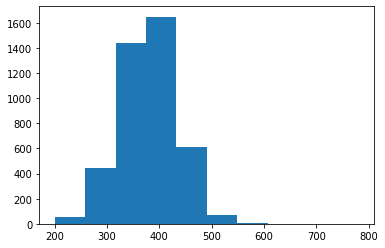

In [0]:
plt.hist(k1['weight'])

((array([-3.59492842, -3.35710921, -3.22590626, ...,  3.22590626,
          3.35710921,  3.59492842]),
  array([199.79055877, 209.09220056, 217.48181818, ..., 646.79208366,
         677.87446809, 781.46670951])),
 (53.710798722512706, 380.4767389332157, 0.9961997302559279))

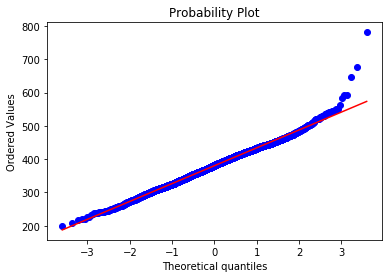

In [7]:
stats.probplot(k1['weight'], plot=sns.mpl.pyplot)

In [8]:
from sklearn.preprocessing import MinMaxScaler

data =k1['weight'].values.reshape(-1,1)
scaler = MinMaxScaler()
print(scaler.fit(data))

print(scaler.data_max_)
print(' ')

print(scaler.transform(data))

MinMaxScaler(copy=True, feature_range=(0, 1))
[781.46670951]
 
[[0.18691199]
 [0.1837232 ]
 [0.19566543]
 ...
 [0.35185501]
 [0.38990569]
 [0.35041644]]


In [0]:
k1['weight'].max()

781.4667095115683

In [0]:
k1['weight'].min()

199.79055876685936

In [0]:
k1['weight'].std()

53.88058982941292

In [0]:
k1['weight'].mean()

380.4767389332148